In [65]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

import tensorflow as tf

In [66]:
master = pd.read_csv('data/crimes_nat_tinker.csv')
master.drop(['Unnamed: 0','Unnamed: 0.1','SHOOTING'],axis=1,inplace=True)
master = pd.get_dummies(master, columns=['DAY_OF_WEEK'])
master.neighborhood_avg = np.log(master.neighborhood_avg)
master.closest_property_value = np.log(master.closest_property_value)
master.head()

,Lat,Long,MONTH,HOUR,TAVG,PRCP,SNOW,closest_property_value,neighborhood_avg,lamp_min_dist,lamp_density,category,police_min_dist,police_density,hospital_min_dist,hospital_density,school_min_dist,school_density,DAY_OF_WEEK_Friday,DAY_OF_WEEK_Monday,DAY_OF_WEEK_Saturday,DAY_OF_WEEK_Sunday,DAY_OF_WEEK_Thursday,DAY_OF_WEEK_Tuesday,DAY_OF_WEEK_Wednesday
0,42.259518,-71.121563,10,9,59.0,0.00,0.0,13.025852,12.996051,0.001234,563.0,theft,0.004067,1.0,0.041388,0.0,0.004665,4.0,0,0,0,1,0,0,0
1,42.262092,-71.116710,10,20,56.0,0.01,0.0,13.201729,13.023400,0.000539,531.0,theft,0.009414,1.0,0.036018,0.0,0.001244,3.0,0,0,1,0,0,0,0
2,42.352375,-71.135096,10,15,56.0,0.01,0.0,12.468052,13.287047,0.000167,1272.0,theft,0.015767,0.0,0.010692,0.0,0.002624,3.0,0,0,1,0,0,0,0
3,42.349476,-71.076402,10,4,56.0,0.01,0.0,13.106234,14.326388,0.000074,4461.0,theft,0.012329,0.0,0.012304,0.0,0.001918,6.0,0,0,1,0,0,0,0
4,42.381846,-71.066551,10,8,71.0,0.22,0.0,13.637460,13.313802,0.000108,2672.0,theft,0.011801,0.0,0.016170,0.0,0.002848,3.0,0,0,0,0,0,0,1


In [67]:
X, y = master.drop(['category'], axis=1), master['category']

In [68]:
master = master[list(master.columns[master.columns != 'category']) +['category']]
new = pd.DataFrame({'category':master.category.unique(),'number':[1,2,3,4,5,6,7,8,9,10,11]})
master = master.merge(new, on='category',how='left')
master.drop(['category'],axis=1,inplace=True)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(master.loc[:, master.columns != 'number'], 
                                                         master.number, test_size=0.2, 
                                                         random_state = 109, 
                                                         stratify = master.number)


#X_train = X_train.astype(float)

In [70]:
#X_train = master.iloc[:,0:-1]
#y_train = master.iloc[:,-1]
y_train
#X_test.shape

194336     8
6027       8
74449      9
142769     7
79307      1
          ..
9285       7
129610     3
217800     1
82414      8
24395     10
Name: number, Length: 196927, dtype: int64

In [71]:
# define infrastructure of model
model_overfit = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'), # first hidden layer with activation relu
    tf.keras.layers.Dense(100, activation='relu'), # second hidden layer with activation relu
    tf.keras.layers.Dense(100, activation='relu'), # third hidden layer with activation relu
    tf.keras.layers.Dense(11, activation='sigmoid') # output layer with activation sigmoid
])

In [72]:
# set up parameters for compiling
loss_fn   = tf.keras.losses.CategoricalHinge()
optimizer = tf.keras.optimizers.Adam()

In [73]:
# compile the model
model_overfit.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])

In [74]:
# get appropriate X and y for training into numpy array format
X_train = np.array(X_train)
y_train = np.array(y_train)

In [75]:
# fit model with parameters from above 
history = model_overfit.fit(X_train, y_train, validation_split=0.3, batch_size=128, epochs=3, verbose=1)

Train on 137848 samples, validate on 59079 samples
Epoch 1/3
137848/137848 [==============================] - 3s 21us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/3
137848/137848 [==============================] - 2s 17us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/3
137848/137848 [==============================] - 2s 16us/sample - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [76]:
history.history

{'loss': [0.0, 0.0, 0.0],
 'accuracy': [0.0, 0.0, 0.0],
 'val_loss': [0.0, 0.0, 0.0],
 'val_accuracy': [0.0, 0.0, 0.0]}

In [77]:
# model_overfit.evaluate(X_train, y_train, verbose=0)
pd.Series(model_overfit.predict_classes(X_train)).value_counts()

1    179275
3     17115
6       537
dtype: int64

In [78]:
pd.Series(y_train).value_counts()

1     33493
8     30193
4     26885
7     21838
2     18822
3     17632
9     17605
10    15570
5      7449
6      3978
11     3462
dtype: int64

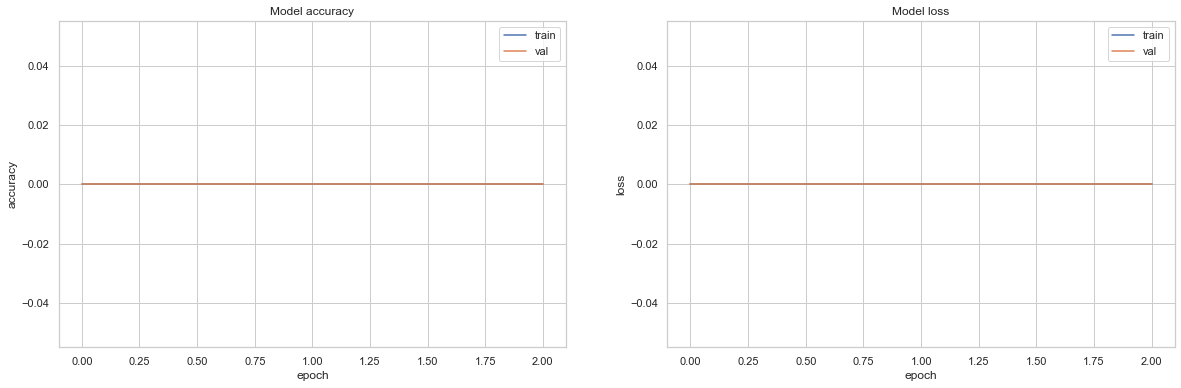

In [79]:
# plot accuracy and loss for the test set
fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

plt.show()

In [80]:
train_loss, NN_model_train_auc = model_overfit.evaluate(X_train, y_train, verbose=0)
test_loss, NN_model_test_auc = model_overfit.evaluate(X_test.values, y_test.values, verbose=0)


print("NN_Model: AUC, Training Set \t : {:.4}".format(NN_model_train_auc))
print("NN_Model: AUC, Testing Set \t : {:.4}".format(NN_model_test_auc))

NN_Model: AUC, Training Set 	 : 0.0
NN_Model: AUC, Testing Set 	 : 0.0


## Create an ANN that predicts Crime Type

- 3.3.1 Save your model's training accuracy as a variable called `train_acc` and make sure it prints in the assert cell provided
- 3.3.2 Additionally, display model summary, training and validation accuracy and loss (yes, the training accuracy should be displayed again here).
- 3.3.3 Print the difference between training and validation accuracy and loss.
- 3.3.4 Plot the training accuracy and validation accuracy as a function of epochs.





In [81]:
# Create ANN that doesn't overfit through regularization

# callbacks
# watch validation loss and be "patient" for 50 epochs of no improvement
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10)

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(100, input_shape=(X_train.shape[1], ), activation='relu', 
                        kernel_regularizer= tf.keras.regularizers.l2(l=0.1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(100, input_shape=(X_train.shape[1], ), activation='relu', 
                        kernel_regularizer= tf.keras.regularizers.l2(l=0.1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(100, input_shape=(X_train.shape[1], ), activation='relu', 
                       kernel_regularizer= tf.keras.regularizers.l2(l=0.1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(11, activation='sigmoid')
])


In [82]:
# compile

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss= 'mean_absolute_error',
              metrics=['accuracy'])


In [83]:
# fit
history_regular = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=16,
                    verbose=1)

Train on 157541 samples, validate on 39386 samples
Epoch 1/5
157541/157541 [==============================] - 30s 189us/sample - loss: 4.4176 - accuracy: 0.0830 - val_loss: 4.2700 - val_accuracy: 2.5390e-05
Epoch 2/5
157541/157541 [==============================] - 24s 155us/sample - loss: 4.2796 - accuracy: 0.6571 - val_loss: 4.2700 - val_accuracy: 1.0000
Epoch 3/5
157541/157541 [==============================] - 25s 161us/sample - loss: 4.2796 - accuracy: 1.0000 - val_loss: 4.2700 - val_accuracy: 1.0000
Epoch 4/5
157541/157541 [==============================] - 25s 157us/sample - loss: 4.2796 - accuracy: 1.0000 - val_loss: 4.2700 - val_accuracy: 1.0000
Epoch 5/5
157541/157541 [==============================] - 26s 164us/sample - loss: 4.2796 - accuracy: 1.0000 - val_loss: 4.2700 - val_accuracy: 1.0000


In [84]:
# Save your model's training accuracy as a variable called kaggle_train_acc
kaggle_train_loss, kaggle_train_acc = model.evaluate(X_train, y_train, verbose=0)

In [85]:
# display model summary, training and validation accuracy and loss
model.summary()
kaggle_train_loss, kaggle_train_acc = model.evaluate(X_train, y_train, verbose=0)

print()
print('Model Train Accuracy: ', kaggle_train_acc)
print('Model Train Loss: ', history_regular.history['loss'][-1])

print('Model Validation Accuracy: ', history_regular.history['val_accuracy'][-1])
print('Model VAlidation Loss: ', history_regular.history['val_loss'][-1])




Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 100)               2500      
_________________________________________________________________
batch_normalization_9 (Batch (None, 100)               400       
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 100)               10100     
_________________________________________________________________
batch_normalization_10 (Batc (None, 100)               400       
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 100)              

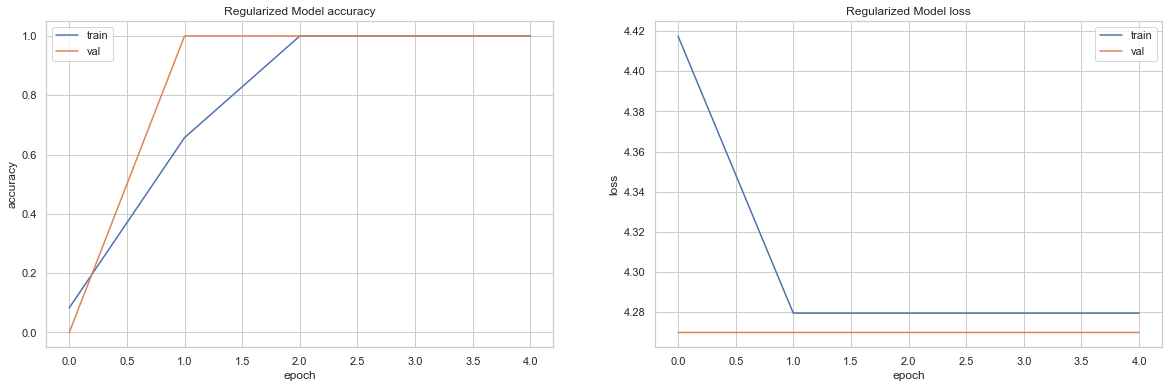

In [86]:
# plot train and val acc as  a function of epochs

fig, ax = plt.subplots(1,2, figsize=(20,6))

ax[0].plot(history_regular.history['accuracy'])
ax[0].plot(history_regular.history['val_accuracy'])
ax[0].set_title('Regularized Model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history_regular.history['loss'])
ax[1].plot(history_regular.history['val_loss'])
ax[1].set_title('Regularized Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [87]:
train_loss, NN_model_train_auc = model.evaluate(X_train, y_train, verbose=0)
test_loss, NN_model_test_auc = model.evaluate(X_test.values, y_test.values, verbose=0)


print("NN_Model: AUC, Training Set \t : {:.4}".format(NN_model_train_auc))
print("NN_Model: AUC, Testing Set \t : {:.4}".format(NN_model_test_auc))

NN_Model: AUC, Training Set 	 : 1.0
NN_Model: AUC, Testing Set 	 : 1.0
